In [1]:
import pandas as pd
import os
import re
import numpy as np
import string
import gc

In [2]:
!jt -t chesterish -cellw 1700 -cursc g -nf JBBold -f ibmMonoRegular -nfs 15 -fs 15 -T -N -kl -tf ibmMonoRegular -dfs 13 -tfs 14 -ofs 12

In [3]:
### Import dataset
data = pd.read_csv(os.path.join(os.getcwd().replace('notebooks', ''), 'data', 'password_dataset.csv'))

In [4]:
data.shape

(669879, 2)

In [5]:
data.head()

,password,strength
0,kzde5577,moderate
1,kino3434,moderate
2,visi7k1yr,moderate
3,megzy123,moderate
4,lamborghin1,moderate


In [6]:
data.dtypes

password    object
strength    object
dtype: object

In [7]:
pwords = data.iloc[:, 0]

In [8]:
type(pwords)

pandas.core.series.Series

In [9]:
new_data = data.copy()

In [10]:
def count_characters(s, upper = False, alpha = True):
    
    ''' Count the characters in the string:
        upper alphabets, lower alphabets, or numeric characters. '''
    
    if alpha:
        if upper:
            r = len([l for l in s if l in string.ascii_uppercase])
        else:
            r = len([l for l in s if l in string.ascii_lowercase])
    else:
        r = len([n for n in s if n.isnumeric()])
    
    return r

**Missing values**

In [11]:
### Missing passwords?
pwords.isnull().sum()

1

In [12]:
### Find the index for missing password
missing_ix = pwords[pwords.isnull()].index.values.item()

In [13]:
missing_ix

367718

In [14]:
data.iloc[missing_ix, :]

password     NaN
strength    weak
Name: 367718, dtype: object

In [15]:
data['strength'].value_counts()

moderate    496801
weak         89702
strong       83137
Name: strength, dtype: int64

In [16]:
data['strength'].isnull().sum()

239

In [17]:
d = data[data['strength'].isnull()]['password'].str.lower()

In [18]:
d.unique()

array(['selim'], dtype=object)

In [19]:
selim_ix = np.where(data['password'].str.lower() == 'selim')[0]

In [20]:
selim_ix

array([  2808,   4639,   7169,  11218,  13807,  14130,  14291,  14863,
        17417,  22799,  24999,  26601,  26740,  29700,  32765,  32876,
        35641,  36548,  38730,  40565,  40574,  41862,  46859,  47937,
        48626,  48906,  57580,  58780,  58982,  61516,  63449,  68139,
        72081,  74025,  77809,  83956,  85293,  88663,  89196,  92497,
        92749,  93687,  94774,  97332, 102314, 103419, 106870, 109361,
       110115, 110463, 113841, 115632, 121516, 123690, 124706, 129606,
       133174, 135530, 138040, 139483, 140399, 144091, 149848, 151829,
       158012, 162045, 164513, 170311, 171323, 171422, 175918, 176208,
       183601, 190262, 191681, 191986, 195448, 195752, 197122, 199261,
       202601, 209958, 213216, 217058, 220119, 223516, 226291, 227033,
       227339, 227806, 228514, 228731, 232041, 232424, 234488, 239624,
       240459, 244516, 245393, 246166, 246653, 246750, 247187, 250274,
       255325, 257092, 264624, 265026, 269148, 271358, 273973, 274740,
      

In [21]:
### Drop the missing values
data.drop(labels = [missing_ix] + selim_ix.tolist(), axis = 0, inplace = True)
new_data.drop(labels = [missing_ix] + selim_ix.tolist(), axis = 0, inplace = True)

In [22]:
pwords = data.iloc[:, 0]

**Feature 1:**

**Number of Uppercase alphabets**

In [23]:
new_data['num_upper'] = pwords.apply(count_characters, convert_dtype = False, **{'alpha' : True, 'upper' : True})

**Feature 2:**

**Number of Lowercase alphabets**

In [24]:
new_data['num_lower'] = pwords.apply(count_characters, convert_dtype = False, **{'alpha' : True, 'upper' : False})

**Feature 3:**

**Number of Numeric characters**

In [25]:
new_data['num_numbers'] = pwords.apply(count_characters, convert_dtype = False, **{'alpha' : False, 'upper' : True})

**Feature 4:**

**Length of password**

In [26]:
new_data['password_length'] = pwords.apply(lambda x: len(x))

In [27]:
new_data.head()

,password,strength,num_upper,num_lower,num_numbers,password_length
0,kzde5577,moderate,0,4,4,8
1,kino3434,moderate,0,4,4,8
2,visi7k1yr,moderate,0,7,2,9
3,megzy123,moderate,0,5,3,8
4,lamborghin1,moderate,0,10,1,11


In [28]:
def get_consecutive_numbers(x):
    ix = -1
    num_consec = 0
    
    for s in x:
        ### Account for possible multiple character occurences
        if x.count(s) > 1:
            ix += 1
        else:
            ix = x.index(s)
        
        ### Watch out for end of string
        if ix == len(x) - 1:
            break
        else:
            ### Finally, count
            if s.isnumeric() & x[ix + 1].isnumeric():
                num_consec += 1
    
    return num_consec

**Feature 5:**

**Number of consecutive number pairs**

In [29]:
new_data['consecutive_num_pairs'] = pwords.apply(get_consecutive_numbers)

In [30]:
new_data.head(n = 10)

,password,strength,num_upper,num_lower,num_numbers,password_length,consecutive_num_pairs
0,kzde5577,moderate,0,4,4,8,3
1,kino3434,moderate,0,4,4,8,3
2,visi7k1yr,moderate,0,7,2,9,0
3,megzy123,moderate,0,5,3,8,2
4,lamborghin1,moderate,0,10,1,11,0
5,AVYq1lDE4MgAZfNt,strong,9,5,2,16,0
6,u6c8vhow,moderate,0,6,2,8,0
7,v1118714,moderate,0,1,7,8,6
8,universe2908,moderate,0,8,4,12,3
9,as326159,moderate,0,2,6,8,5


**Feature 6:**

**Consecutive keyboard buttons?**

In [31]:
pattern = r'.*(qwert|qwer|rewq|wert|poiu|oiuy|bvcx|uytr|hgfd|iuyt|xcvb|sdfg|fghj|mnbv|jhgf|asdf|zxcv|poiuy|;lkj|lkjh|erty|rtyui|dfghj|cvbnm).*'

In [32]:
new_pattern = pattern[::-1].replace('(', ')')

In [33]:
new_pattern = new_pattern.replace(')', '(')

In [34]:
new_pattern

'*.(mnbvc|jhgfd|iuytr|ytre|hjkl|jkl;|yuiop|vcxz|fdsa|fghj|vbnm|jhgf|gfds|bvcx|tyui|dfgh|rtyu|xcvb|yuio|uiop|trew|qwer|rewq|trewq(*.'

In [35]:
new_pattern = '.*' + new_pattern[2:-3] + ')' + '.*'

In [36]:
pattern

'.*(qwert|qwer|rewq|wert|poiu|oiuy|bvcx|uytr|hgfd|iuyt|xcvb|sdfg|fghj|mnbv|jhgf|asdf|zxcv|poiuy|;lkj|lkjh|erty|rtyui|dfghj|cvbnm).*'

In [37]:
new_pattern

'.*(mnbvc|jhgfd|iuytr|ytre|hjkl|jkl;|yuiop|vcxz|fdsa|fghj|vbnm|jhgf|gfds|bvcx|tyui|dfgh|rtyu|xcvb|yuio|uiop|trew|qwer|rewq|trewq).*'

In [38]:
match = re.match(re.compile(pattern), 'tdiefuiuodjhgfasdf')

In [39]:
def match_re(s, p1, p2):
    
    ''' Match patterns p1 and p2 to string, s.'''
    
    if re.match(p1, s.lower()) or re.match(p2, s.lower()):
        return True
    else:
        return False

In [40]:
new_data['consec_kboard_chars'] = pwords.apply(match_re, convert_dtype = True,
                                               **dict(zip(('p1', 'p2'), (pattern, new_pattern))))

In [41]:
new_data.head(10)

,password,strength,num_upper,num_lower,num_numbers,password_length,consecutive_num_pairs,consec_kboard_chars
0,kzde5577,moderate,0,4,4,8,3,False
1,kino3434,moderate,0,4,4,8,3,False
2,visi7k1yr,moderate,0,7,2,9,0,False
3,megzy123,moderate,0,5,3,8,2,False
4,lamborghin1,moderate,0,10,1,11,0,False
5,AVYq1lDE4MgAZfNt,strong,9,5,2,16,0,False
6,u6c8vhow,moderate,0,6,2,8,0,False
7,v1118714,moderate,0,1,7,8,6,False
8,universe2908,moderate,0,8,4,12,3,False
9,as326159,moderate,0,2,6,8,5,False


In [42]:
new_data['consec_kboard_chars'].value_counts()

False    667288
True       2351
Name: consec_kboard_chars, dtype: int64

In [43]:
new_data[new_data['consec_kboard_chars'] == True]

,password,strength,num_upper,num_lower,num_numbers,password_length,consecutive_num_pairs,consec_kboard_chars
269,QWERTY0011,moderate,6,0,4,10,3,True
397,asdasdf1,moderate,0,7,1,8,0,True
586,azerty32,moderate,0,6,2,8,1,True
1046,qwertyp17,moderate,0,7,2,9,1,True
1315,aw34rtgvcxz,moderate,0,9,2,11,1,True
...,...,...,...,...,...,...,...,...
668544,property138,moderate,0,8,3,11,2,True
668856,1VHFgHjAyOAd2ZWI,strong,10,4,2,16,0,True
668913,azerty312,moderate,0,6,3,9,2,True
669490,2456asdf,moderate,0,4,4,8,3,True


In [44]:
new_data['num_upper'].value_counts()

0     582570
7      13902
8      12920
6      12761
1       9289
5       9067
9       8984
4       5542
10      4771
2       3750
3       3348
11      1920
12       580
13       149
14        40
15        13
16         8
17         7
19         5
25         3
22         3
18         3
80         1
30         1
38         1
77         1
Name: num_upper, dtype: int64

In [45]:
new_data[new_data['num_upper'] > 20]

,password,strength,num_upper,num_lower,num_numbers,password_length,consecutive_num_pairs,consec_kboard_chars
8897,2N8ziL2L3N!&R@s6VDTSWP33KyKlvoeCNqT1*3Ejf7rG6l...,strong,25,18,16,64,1,False
26977,In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...,strong,80,109,31,220,3,False
108013,YZM4YVKKBV7MDZ4FFDZZ-DVVDY,strong,22,0,3,26,0,False
125650,bV1*tB2$s$LW0$fgCqGetE$dZop9ugK7ftSl8BQu*$E4!r...,strong,30,34,15,100,1,False
238016,n43sSh567hDjJ678Fj5D857I6j58SjJ876F89762k3liyU...,strong,38,70,39,147,17,False
266666,LAUD123FILTER* DETEKTORENPRIEM,strong,25,0,3,30,2,False
304560,vB83QK4g6DCtyNmVMkJdehj9UGZFfLHAPETsbrRcX2oa72Wp,strong,22,18,8,48,2,False
412567,eH8]Ioq]aZd))sdDN0IAFvGSOJFxWW(HSUyZ>JgrYwe-M,strong,22,14,2,45,0,False
439087,LAUD123FILTER*+DETEKTORENPRIEM,strong,25,0,3,30,2,False
465207,OPy9W1DF4BKWKGJqcU1Ru6cRn1ekM9BvJAP7GxSAw78iaF...,strong,77,75,33,185,3,False


In [46]:
def count_punct(s):
    
    ''' Count punctuation occurences. '''
    
    num_punct = 0
    for l in s:
        if l in string.punctuation:
            num_punct += 1
    return num_punct

def count_whitespaces(s):
    
    ''' Count whitespace occurences. '''
    
    num_space = 0
    for l in s:
        if l in string.whitespace:
            num_space += 1
    return num_space


def get_consecutive_punct(x):
    
    ''' Count consecutive punctuation pairs. '''
    
    ix = -1
    num_consec = 0
    
    for s in x:
        if x.count(s) > 1:
            ix += 1
        else:
            ix = x.index(s)
        
        if ix == len(x) - 1:
            break
        else:
            if (s in string.punctuation) & (x[ix + 1] in string.punctuation):
                num_consec += 1
    return num_consec


def get_consecutive_whitespaces(x):
    
    ''' Count consecutive punctuation pairs. '''
    
    ix = -1
    num_consec = 0
    
    for s in x:
        if x.count(s) > 1:
            ix += 1
        else:
            ix = x.index(s)
        
        if ix == len(x) - 1:
            break
        else:
            if (s in string.whitespace) & (x[ix + 1] in string.whitespace):
                num_consec += 1
    return num_consec

**Feature 7:**

**Number of punctuations**

In [47]:
new_data['num_puncts'] = pwords.apply(count_punct)

**Feature 8:**

**Number of consecutive punctuation pairs**

In [48]:
new_data['num_consec_punct_pairs'] = pwords.apply(get_consecutive_punct)

In [49]:
new_data.head(20)

,password,strength,num_upper,num_lower,num_numbers,password_length,consecutive_num_pairs,consec_kboard_chars,num_puncts,num_consec_punct_pairs
0,kzde5577,moderate,0,4,4,8,3,False,0,0
1,kino3434,moderate,0,4,4,8,3,False,0,0
2,visi7k1yr,moderate,0,7,2,9,0,False,0,0
3,megzy123,moderate,0,5,3,8,2,False,0,0
4,lamborghin1,moderate,0,10,1,11,0,False,0,0
5,AVYq1lDE4MgAZfNt,strong,9,5,2,16,0,False,0,0
6,u6c8vhow,moderate,0,6,2,8,0,False,0,0
7,v1118714,moderate,0,1,7,8,6,False,0,0
8,universe2908,moderate,0,8,4,12,3,False,0,0
9,as326159,moderate,0,2,6,8,5,False,0,0


In [50]:
new_data['num_puncts'].value_counts()

0     651746
1      11534
2       3588
3       1613
4        543
6        308
5        167
7         56
8         36
9         24
10        13
13         3
11         2
12         2
21         1
16         1
17         1
20         1
Name: num_puncts, dtype: int64

In [51]:
new_data['num_consec_punct_pairs'].value_counts()

0     666451
1       1661
2        866
3        292
5        196
4        111
6         29
7         15
8          7
9          6
11         2
12         1
10         1
14         1
Name: num_consec_punct_pairs, dtype: int64

In [52]:
len(new_data.columns)

10

**Feature 9:**

**Number of consecutive whitespace pairs**

In [53]:
new_data['num_consec_space_pairs'] = pwords.apply(get_consecutive_whitespaces)

**Feature 10:**

**Number of whitespace characters**

In [54]:
new_data['num_whitespaces'] = pwords.apply(count_whitespaces)

In [55]:
new_data['num_whitespaces'].value_counts()

0    668876
1       603
2       111
3        31
4         8
5         6
7         2
6         1
8         1
Name: num_whitespaces, dtype: int64

In [56]:
new_data['num_consec_space_pairs'].value_counts()

0    669616
1        16
2         3
4         2
3         1
5         1
Name: num_consec_space_pairs, dtype: int64

In [57]:
len(new_data.columns)

12

In [58]:
gc.collect()

21

**Data modelling**

In [59]:
new_data = new_data.sample(frac = 1.0)

X = new_data.drop(labels = ['strength', 'password'], axis = 1)
y = new_data['strength']

In [60]:
y.unique()

array(['moderate', 'strong', 'weak'], dtype=object)

In [61]:
y.isnull().sum()

0

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
y = le.fit_transform(y)

In [65]:
le.classes_

array(['moderate', 'strong', 'weak'], dtype=object)

In [66]:
np.unique(y)

array([0, 1, 2])

In [67]:
le.inverse_transform(np.unique(y))

array(['moderate', 'strong', 'weak'], dtype=object)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
### Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.35) ##test_size was 0.4 before
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size = 0.4)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg = LogisticRegression(max_iter = 10000, n_jobs = -1)

In [72]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [73]:
gc.collect()

0

---

## **Model Performance**

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [75]:
print(f'Train performance:\n{classification_report(y_train, log_reg.predict(X_train))}')

Train performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322920
           1       1.00      1.00      1.00     54039
           2       1.00      1.00      1.00     58306

    accuracy                           1.00    435265
   macro avg       1.00      1.00      1.00    435265
weighted avg       1.00      1.00      1.00    435265



In [76]:
print(f'Validation performance:\n{classification_report(y_valid, log_reg.predict(X_valid))}')

Validation performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104328
           1       1.00      1.00      1.00     17459
           2       1.00      1.00      1.00     18837

    accuracy                           1.00    140624
   macro avg       1.00      1.00      1.00    140624
weighted avg       1.00      1.00      1.00    140624



In [77]:
print(f'Test performance:\n{classification_report(y_test, log_reg.predict(X_test))}')

Test performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69553
           1       1.00      1.00      1.00     11639
           2       1.00      1.00      1.00     12558

    accuracy                           1.00     93750
   macro avg       1.00      1.00      1.00     93750
weighted avg       1.00      1.00      1.00     93750



In [78]:
log_reg.coef_

array([[ 6.21131769e-02,  1.61896207e-01,  2.25260220e-01,
         8.57879235e-01,  1.08923995e-01,  3.81882020e-02,
         2.04777133e-01,  1.17346409e-02, -8.78896914e-02,
         6.27974281e-01],
       [ 1.51104923e+00,  1.31847966e+00,  1.64453129e+00,
         1.21732187e+01, -1.99372313e-01, -2.31232726e-02,
         1.93678895e+00, -1.84146793e-01, -4.22919600e-04,
         1.15228452e+00],
       [-1.57316240e+00, -1.48037587e+00, -1.86979151e+00,
        -1.30310979e+01,  9.04483176e-02, -1.50649294e-02,
        -2.14156609e+00,  1.72412153e-01,  8.83126110e-02,
        -1.78025880e+00]])

In [79]:
log_reg.intercept_

array([  17.48495834, -151.87671053,  134.39175219])

---

### **Confusion Matrix**

In [80]:
confusion_matrix(y_train, log_reg.predict(X_train))

array([[322913,      0,      7],
       [     3,  54036,      0],
       [     1,      0,  58305]], dtype=int64)

In [81]:
confusion_matrix(y_valid, log_reg.predict(X_valid))

array([[104328,      0,      0],
       [     0,  17459,      0],
       [     0,      0,  18837]], dtype=int64)

In [82]:
confusion_matrix(y_test, log_reg.predict(X_test))

array([[69552,     0,     1],
       [    1, 11638,     0],
       [    0,     0, 12558]], dtype=int64)

---

### **Train data**

In [83]:
accuracy_score(y_train, log_reg.predict(X_train))

0.9999747280392405

In [84]:
recall_score(y_train, log_reg.predict(X_train), average = 'macro')

0.9999685521499307

In [85]:
precision_score(y_train, log_reg.predict(X_train), average = 'macro')

0.9999558563380809

In [86]:
f1_score(y_train, log_reg.predict(X_train), average = 'macro')

0.9999622030976677

---

### **Validation data**

In [87]:
### Accuracy
accuracy_score(y_valid, log_reg.predict(X_valid))

1.0

In [88]:
### Recall
recall_score(y_valid, log_reg.predict(X_valid), average = 'macro')

1.0

In [89]:
### Precision
precision_score(y_valid, log_reg.predict(X_valid), average = 'macro')

1.0

In [90]:
### F1-score
f1_score(y_valid, log_reg.predict(X_valid), average = 'macro')

1.0

---

### **Test data**

In [91]:
### Accuracy
accuracy_score(y_test, log_reg.predict(X_test))

0.9999786666666667

In [92]:
### Recall
recall_score(y_test, log_reg.predict(X_test), average = 'macro')

0.9999665681469173

In [93]:
### Precision
precision_score(y_test, log_reg.predict(X_test), average = 'macro')

0.9999686661003494

In [94]:
### F1-score
f1_score(y_test, log_reg.predict(X_test), average = 'macro')

0.9999676159800925

### Test Password Strength

In [95]:
def generate_features(df):
    
    ''' Generate features for password(s). '''
    
    data = pd.DataFrame()
    
    data['num_upper'] = df.apply(count_characters, convert_dtype = False, **{'alpha' : True, 'upper' : True})
    data['num_lower'] = df.apply(count_characters, convert_dtype = False, **{'alpha' : True, 'upper' : False})
    data['num_numbers'] = df.apply(count_characters, convert_dtype = False, **{'alpha' : False, 'upper' : True})
    
    data['password_length'] = df.apply(lambda x: len(x))
    data['consecutive_num_pairs'] = df.apply(get_consecutive_numbers)
    data['consec_kboard_chars'] = df.apply(match_re, convert_dtype = True,
                                           **dict(zip(('p1', 'p2'), (pattern, new_pattern))))
    
    data['num_puncts'] = df.apply(count_punct)
    data['num_consec_punct_pairs'] = df.apply(get_consecutive_punct)
    data['num_consec_space_pairs'] = df.apply(get_consecutive_whitespaces)
    
    data['num_whitespaces'] = df.apply(count_whitespaces)
    
    return data

In [96]:
def get_prediction(s, model, return_features = False):
    
    ''' Obtain strength prediction for password(s). '''
    
    p = pd.Series(s)
    
    features = generate_features(p)
    pred = model.predict(features)
    pred = le.inverse_transform(pred)
    
    return (pred, features) if return_features else pred

In [97]:
p = get_prediction('shcjIIICJIhdytGSG6138966)(76%%)', model = log_reg, return_features = True)

In [98]:
p[1].T

,0
num_upper,9
num_lower,8
num_numbers,9
password_length,31
consecutive_num_pairs,7
consec_kboard_chars,False
num_puncts,5
num_consec_punct_pairs,3
num_consec_space_pairs,0
num_whitespaces,0


In [99]:
get_prediction('4444444444444444', log_reg, True)[1].T

,0
num_upper,0
num_lower,0
num_numbers,16
password_length,16
consecutive_num_pairs,15
consec_kboard_chars,False
num_puncts,0
num_consec_punct_pairs,0
num_consec_space_pairs,0
num_whitespaces,0


In [100]:
get_prediction('Discombobulation', model = log_reg)

array(['strong'], dtype=object)

In [101]:
get_prediction('623r2977786E8FV  V83GED736F', model = log_reg)

array(['strong'], dtype=object)

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 720x720 with 0 Axes>

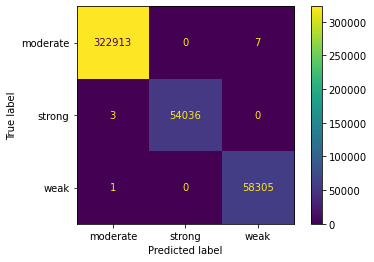

In [103]:
import matplotlib.pyplot as plt
cmd = ConfusionMatrixDisplay(confusion_matrix(y_train, log_reg.predict(X_train)),
                             display_labels = le.inverse_transform([0, 1, 2]))
#plt.imshow(cmd.im_)
plt.figure(figsize = (10, 10))
cmd.plot()
plt.show()

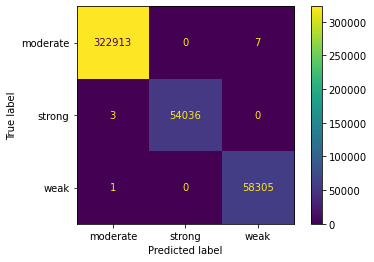

In [104]:
cmd.figure_

In [105]:
dir(cmd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ax_',
 'confusion_matrix',
 'display_labels',
 'figure_',
 'im_',
 'plot',
 'text_']

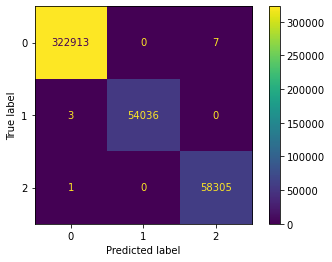

In [106]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_train, y_train)

In [107]:
from setuptools import setup

In [114]:
p = get_prediction(['chjvh', 'shducryf'], model = log_reg)

In [117]:
for n, i in zip([1, 2], p):
    print(f'{n} gives {i}')

1 gives weak
2 gives moderate


In [ ]:
print(os.getcwd())